In [1]:
from scarsa_lambda_br import *

import pickle

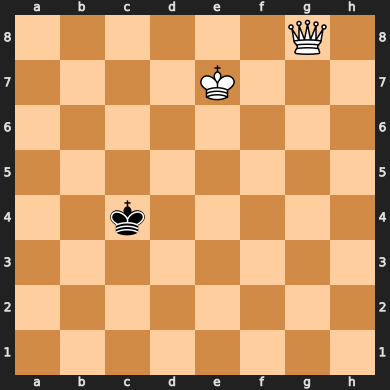

In [2]:
L_start = np.array([[2,4,5],[6,4,2]])

Q, N, E, trend_results = scarsa_lambda(L_start, num_games = 1000, num_turns=20)

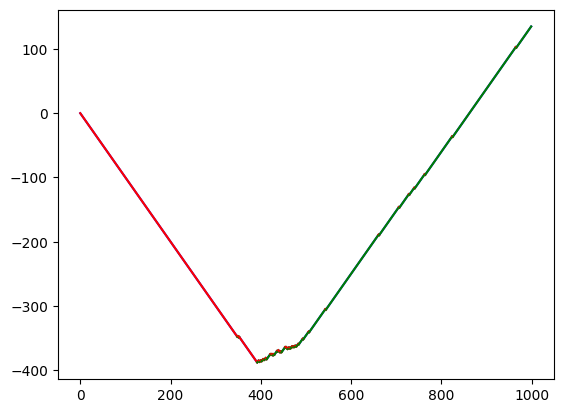

In [3]:
trend_plot(trend_results)

In [4]:
#Save the "trained model"
for keys in Q:
    Q[keys] = dict(Q[keys])
Q = dict(Q)

N = dict(N)


with open('Q_s_20t_1000g.pickle', 'wb') as handle:
    pickle.dump(Q, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('N_s_20t_1000g.pickle', 'wb') as handle:
    pickle.dump(N, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [5]:
# Count the percentage of wins:
# --> learnedperc: percentage of wins excluding the first n-games of training.

vals = trend_results #trend list
df = pd.DataFrame(data=vals, columns=['Value'])
df['difference'] = df.diff()
learnlist = []

for i in range(0,10):
    n = i*100 #define the threshold after which calculate the percentage of wins.
    count1 = 0
    count2 = 0
    for i in range(1, len(trend_results)): 
        if df.iloc[i, 1] == 1: 
            count1 += 1
        if df.iloc[i, 1] == 1 and i > n: 
            count2 += 1
    #totPerc = round(count1*100 / len(trend_results), 3)
    learnedPerc = round(count2*100 / (len(trend_results)-n), 3)
    learnlist.append(learnedPerc)

    #print("Total percentage of wins:", totPerc, "%", "\nPercentage of wins excluding the first", n, "games:", learnedPerc, "%")
    if n == 0: 
        print("Total percentage of wins:", learnedPerc, "%")
    else: 
        print("Percentage of wins excluding the first", n, "games:", learnedPerc, "%")

Total percentage of wins: 56.7 %
Percentage of wins excluding the first 100 games: 63.0 %
Percentage of wins excluding the first 200 games: 70.875 %
Percentage of wins excluding the first 300 games: 81.0 %
Percentage of wins excluding the first 400 games: 93.333 %
Percentage of wins excluding the first 500 games: 98.0 %
Percentage of wins excluding the first 600 games: 98.0 %
Percentage of wins excluding the first 700 games: 97.667 %
Percentage of wins excluding the first 800 games: 98.5 %
Percentage of wins excluding the first 900 games: 98.0 %


Text(0, 0.5, 'percentage of wins')

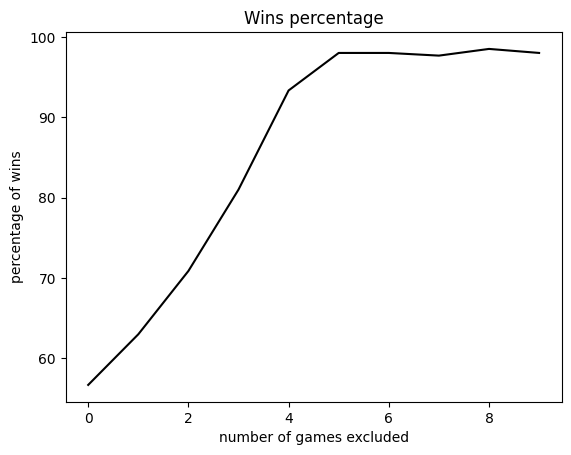

In [6]:
plt.plot(learnlist, color = 'black', )
plt.title("Wins percentage")
plt.xlabel("number of games excluded")
plt.ylabel("percentage of wins")
